In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set path for file
file01= "city_data.csv"
file02="ride_data.csv"

In [3]:
city=pd.read_csv(file01, encoding="utf-8")
rides=pd.read_csv(file02, encoding="utf-8")

In [4]:
city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
rides.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
merged= pd.merge(city, rides, on="city")
merged.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


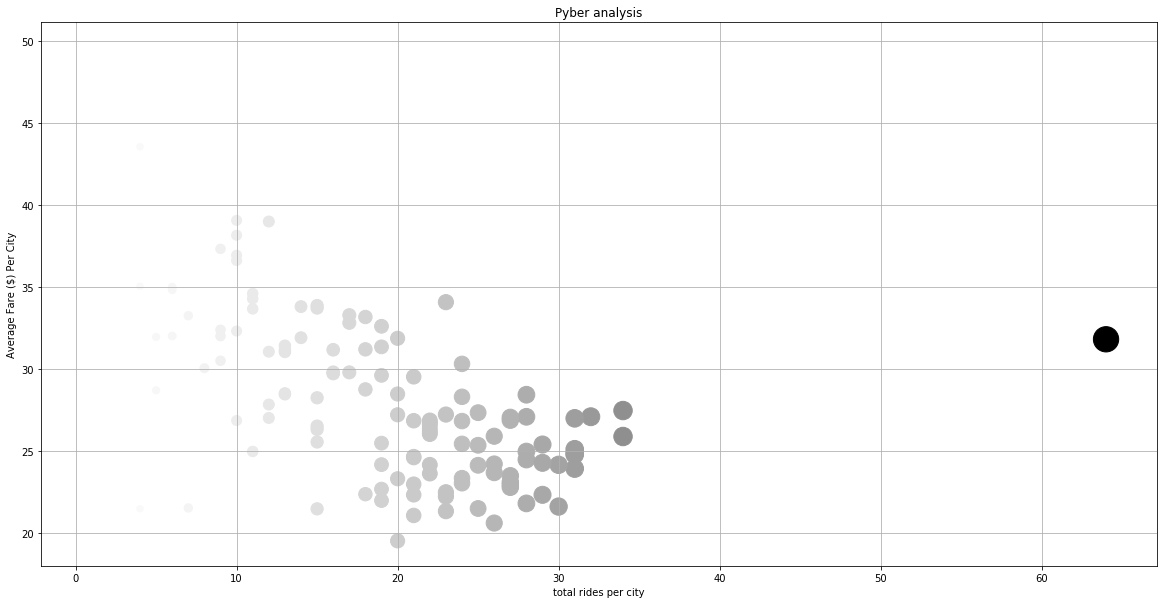

In [7]:
# average fare per ci
grp = merged.groupby(['city'])
grp.head()
average_fare_per_city=grp["fare"].mean()
total_rides_per_city= grp["ride_id"].count()
total_drivers=grp["driver_count"].count()
#total_drivers=grp["driver_count"].unique()
city_type=grp["type"].unique()
data=pd.DataFrame({"city type" :city_type,"number of drivers per city":total_drivers, 
                   "total rides per city" : total_rides_per_city, 
                   "Average Fare ($) Per City":average_fare_per_city
                          } )

data.head()
data["Average Fare ($) Per City"] =pd.to_numeric(data["Average Fare ($) Per City"])
data["total rides per city"]=pd.to_numeric(data["total rides per city"])
data["number of drivers per city"]=pd.to_numeric(data["number of drivers per city"])

#color=[]
#for data in data:
 #   color.append(data["city type"]) 
    
 #area.append(sqrt(data[8])) 
#size= data["Average Fare ($) Per City"]
#colors= data["city type"] 
#["green","red","blue"]
#data.plot(kind="scatter", x="number of drivers per city", y="total rides per city",
 #       grid=True, figsize=(20,10),title="Pyber analysis",s= size * 10)

#color= data["city type"]== "Urban"
size_02= data["number of drivers per city"]
data.plot(kind="scatter", x="total rides per city", y="Average Fare ($) Per City",
       grid=True, figsize=(20,10),title="Pyber analysis",s= size_02 *10, c=size_02)
    
    
#sns.lmplot(x="number of drivers per city", y="total rides per city", data=data, hue="city type",fit_reg=False,)

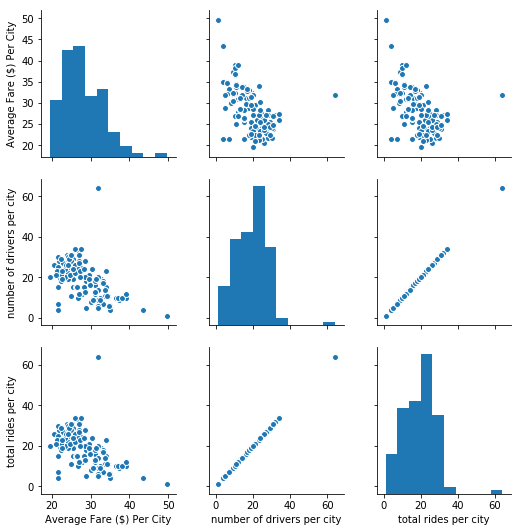

In [9]:
sns.pairplot(data, kind="scatter")

In [8]:
grp_type = merged.groupby(['type'])
grp_type.head()


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829
1625,Carrollbury,4,Suburban,2016-05-09 03:12:10,25.00,485795568537
1626,Carrollbury,4,Suburban,2016-06-09 05:04:24,49.47,617204620844
1627,Carrollbury,4,Suburban,2016-05-20 06:12:36,35.33,73368831241
1628,Carrollbury,4,Suburban,2016-03-21 17:31:26,20.26,7948046018548
1629,Carrollbury,4,Suburban,2016-08-20 11:20:51,46.67,4786094151694


In [18]:
grp_type["fare"].sum()
grp_type["driver_count"].sum()
grp_type["ride_id"].count()
grp_type["type"].unique()


total_fares_type=grp_type["fare"].sum()
total_drivers_type= grp_type["driver_count"].sum()
total_rides_type=grp_type["ride_id"].count()
city_types02=grp_type["type"].unique()

data_type=pd.DataFrame({"types": city_types02, "total fares by city type":total_fares_type, 
                   "total rides by city type" : total_rides_type, 
                   "total drivers by city type":total_drivers_type
                          } )

data_type


,total drivers by city type,total fares by city type,total rides by city type,types
type,,,,
Rural,727,4255.09,125,[Rural]
Suburban,9730,20335.69,657,[Suburban]
Urban,64501,40078.34,1625,[Urban]


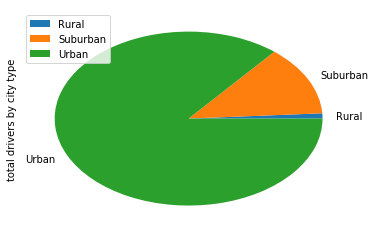

In [33]:
data_type.plot(kind="pie",  y="total drivers by city type",shadow=False)

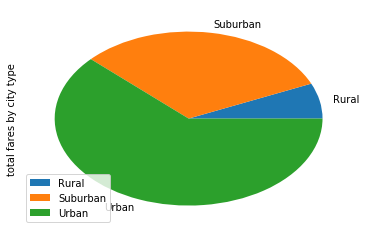

In [30]:
data_type.plot(kind="pie",y="total fares by city type")

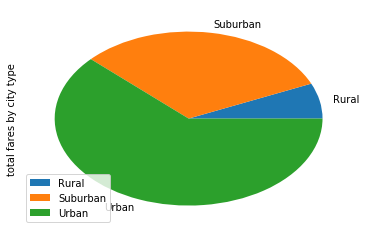

In [31]:
data_type.plot(kind="pie",y="total fares by city type")